In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Extensive_A_Z_medicines_dataset_of_India.csv")
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (256476, 24)


,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2,substitute0,...,Consolidated_Side_Effects,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg),Penciclav 500 mg/125 mg Tablet,...,"Vomiting, Nausea, Diarrhea",Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN,Zithrocare 500mg Tablet,...,"Vomiting, Nausea, Abdominal pain, Diarrhea",Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml),Solvin LS Syrup,...,"Nausea, Vomiting, Diarrhea, Upset stomach, Sto...",Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN,Lcfex Tablet,...,"Headache, Drowsiness, Dizziness, Nausea",Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN,Lcfex Tablet,...,"Headache, Drowsiness, Dizziness, Nausea",Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)


In [3]:
# Combine composition fields and lowercase them
df["composition"] = (
    df["short_composition1"].fillna("") + " " + df["short_composition2"].fillna("")
).str.lower()

# Function to remove dosage values and clean non-alphabet characters
def clean_composition(text):
    text = re.sub(r"\b(\d+mg|\d+mcg|\d+ml)\b", "", text)  # remove dosages
    text = re.sub(r"[^a-zA-Z\s+]", "", text)              # remove non-alpha characters
    text = re.sub(r"\s+", " ", text)                      # normalize spaces
    return text.strip()

# Apply cleaning
df["composition_clean"] = df["composition"].apply(clean_composition)

# Drop empty or duplicate composition rows
df = df[df["composition_clean"] != ""].drop_duplicates(subset=["composition_clean", "name"]).reset_index(drop=True)

print(f"Cleaned dataset shape: {df.shape}")
df[["name", "composition", "composition_clean"]].head()


Cleaned dataset shape: (249668, 26)


,name,composition,composition_clean
0,Augmentin 625 Duo Tablet,amoxycillin (500mg) clavulanic acid (125mg),amoxycillin clavulanic acid
1,Azithral 500 Tablet,azithromycin (500mg),azithromycin
2,Ascoril LS Syrup,ambroxol (30mg/5ml) levosalbutamol (1mg/5ml),ambroxol levosalbutamol
3,Allegra 120mg Tablet,fexofenadine (120mg),fexofenadine
4,Avil 25 Tablet,pheniramine (25mg),pheniramine


In [4]:
# Split cleaned composition into individual words
all_ingredients = df["composition_clean"].str.split().explode()

# Get the top 15 most common ingredients
top_ingredients = all_ingredients.value_counts().head(15)
top_ingredients


composition_clean
paracetamol       17492
acid              14837
ww                11271
aceclofenac        9075
domperidone        8938
cefixime           8928
ofloxacin          8694
clavulanic         8442
amoxycillin        8431
wv                 8333
metformin          7706
rabeprazole        7261
diclofenac         6152
ceftriaxone        6133
levocetirizine     6128
Name: count, dtype: int64

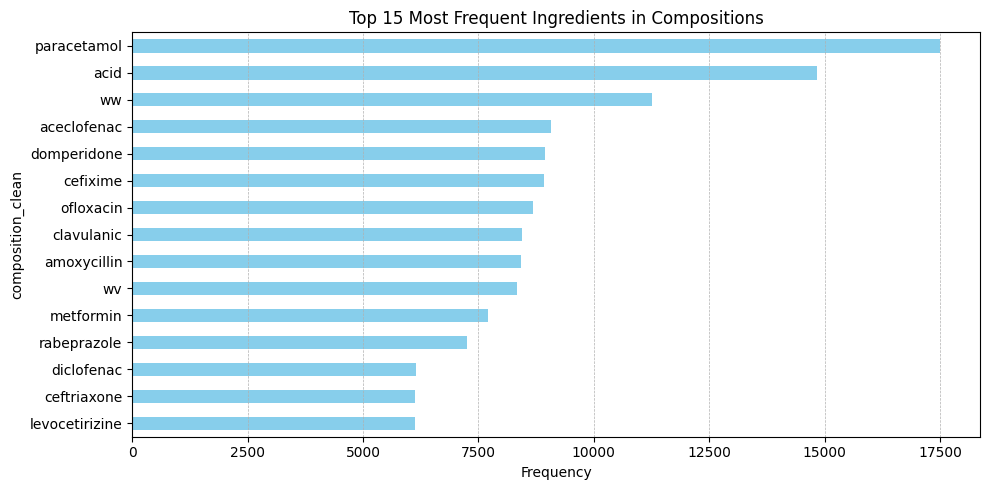

In [5]:
plt.figure(figsize=(10, 5))
top_ingredients.plot(kind='barh', color='skyblue')
plt.title("Top 15 Most Frequent Ingredients in Compositions")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [7]:
# Save cleaned dataset for later use
df.to_csv("../outputs/medicines_cleaned.csv", index=False)
print("Cleaned data saved to outputs/medicines_cleaned.csv")


Cleaned data saved to outputs/medicines_cleaned.csv
